# Preprocessing
This notebook takes as input the book chapters defined in the config.ini file and then calculates some statistics.

In [78]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
book_folder = config['BOOK']['book_folder']
nchapters = int(config['BOOK']['n_chapters'])
language = config['BOOK']['language']
book_folder

'VangeloMatteo'

In [79]:
source_folder = 'sources/' + book_folder + '/'
output_folder = 'data/' + book_folder + '/'
text_complete = ""
chapter_words = []
chapter_info = []

for i in range(1,nchapters+1):
    source_book_file = output_folder + str(i) 
    file = open(source_book_file + '_clean.txt')
    lines = file.readlines()
    
    chapter_text = ''
    for line in lines:
        chapter_text += line
    
    chapter_words.append(len(chapter_text.split(' ')))
    chapter_info.append({'chapter': i, 'words' : chapter_words[i-1], 'chars' : len(chapter_text)})
    text_complete += chapter_text
    file.close()

In [80]:
# number of characters
nchar = len(text_complete)
nchar

117539

In [81]:
# number of words
nwords = len(text_complete.split(' '))
nwords

26318

In [82]:
# average number of words per chapter
import numpy as np
avg_words = np.mean(chapter_words)
avg_words

940.8928571428571

In [88]:
import pandas as pd
df = pd.DataFrame(chapter_info)
df.to_csv(output_folder + 'statistics.csv')
df

,chapter,words,chars
0,1,525,2525
1,2,657,2946
2,3,437,1973
3,4,604,2781
4,5,1166,5311
5,6,877,3989
6,7,683,3045
7,8,863,3724
8,9,935,4101
9,10,981,4518


Build the wordcloud

In [84]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('all')
stopwords.add('will')

In [85]:
wordcloud = WordCloud(width = 800, height = 300, stopwords = stopwords,background_color ='white',  min_font_size = 10)

In [86]:
wordcloud.generate(text_complete) 

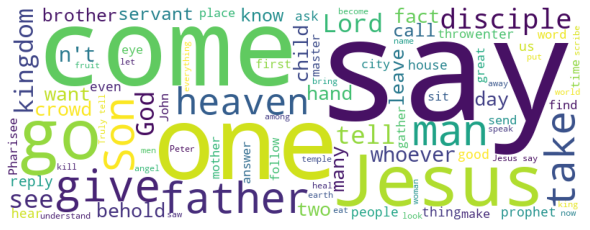

In [87]:
import matplotlib.pyplot as plt

plot_folder = 'plots/' + book_folder + '/'
plt.figure(figsize = (8, 3), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig(plot_folder + 'word_cloud.png')
plt.show() 